# Corso di Probabilità e Statistica - La distribuzione binomiale

In questo capitolo introduciamo la distribuzione binomiale


In [41]:
import scipy.stats as stats #modulo di statistica
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Grafica avanzata

**Generiamo un processo binomiale empiricamente**

In [29]:
#parametri
n=10  #numero di tentativi
p=0.5 #probabilità di successo
NR=1000 #numero di realizzazioni del processo, ovvero quanti tentativi voglio fare di questo processo

In [30]:
bd = np.zeros(n+1) #inizializzazione, creo un vettore di n+1 zeri

Creo il vettore da utilizzare per plottare l'istogramma con il numero di successi che ho ottenuto in ciascuna ripetizione. I data-point totali (la somma delle frequenze di tutti i bins dovrà essere pari al numero di realizzazioni del processo).

In [31]:
for i in range(NR): #loop sulle realizzazioni
    k=0 #k numero di successi
    for j in range(n): #loop su n
        x=np.random.rand() 
        if(x<p): #successo con probabilità p 
            k=k+1 
    bd[k]=bd[k]+1 

Ripeto 1000 volte la seguente procedura: (avrò un dataset di 1000 repliche)
* setto a 0 il numero di successi
* ripeto l'esperimento - eg. lancio della moneta - 10 volte:
    * estraggo un numero casuale
    * se il numero è maggiore di 0.5 è un successo altrimenti no
* aumento il numero di una unità il numero di dati nel bin

In [32]:
bd=bd/NR #normalizzazione
print(bd)

[0.002 0.008 0.051 0.116 0.226 0.22  0.2   0.121 0.048 0.007 0.001]


Normalizzo la distribuzione dato che sommando il numero di unità contenute in tutti i bins è pari al numero di ripetizioni dell'esperimento

**Confrontiamo il risultato empirico con la distribuzione binomiale teorica**

In [33]:
bd1 = stats.binom(n,p) #distribuzione binomiale

Definisco una distribuzione normale teorica utilizzando la funzione di numpy

In [34]:
# confrontiamo i valori di B_p^n(k)
k=3
print((bd[k],bd1.pmf(k))) #confronto i valori per k fissato

(0.116, 0.1171875)


In [35]:
# confrontiamo le media
mu1 = bd1.mean()
mu = np.average(np.arange(n+1), weights=bd) #media pesata sulla distribuzione empirica 
print((mu,mu1))

(4.966, 5.0)


Per la distribuzione teorica mi basta utilizzare il metodo media della funzione binomiale di numpy; per la distribuzione empirica invece devo fare una media pesata (peso ciascun valore per la frequenza empirica - ovvero per il valore del bin normalizzato). Dai valori si osserva che, considerato il piccolo numero di ripetizioni dell'esperienza fatta, si ha una buona compatibilità.

In [36]:
# confrontiamo la varianza
sigma2_1=bd1.var()
sigma2=np.average(np.arange(n+1)**2, weights=bd)-mu**2
print((sigma2,sigma2_1))

(2.578844, 2.5)


Per la distribuzione teorica mi basta utilizzare il metodo di calcolo della varianza già implementato nella classe, per la distribuzione empirica devo fare il calcolo, tenendo conto dei pesi. 

Dai valori si osserva anche in questo caso una buona compatibilità. 
**Nota**: varianza è il secondo moemnto centrale della distribuzione.

In [37]:
# calcoliamo i momenti, nello specifico calcolo il terzo momento centrale della distribuzione
r=3
mom1=bd1.moment(n=r)
mom=np.average(np.arange(n+1)**r,weights=bd)
print((mom1,mom))

(162.5, 160.894)


**Grafici**

In [38]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 14})

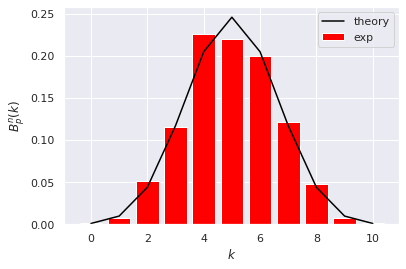

In [54]:
k = np.arange(n+1)
plt.plot(k, bd1.pmf(k), label="theory", color="black") #linee
plt.bar(k,bd, color='red', label="exp")
plt.xlabel(r'$k$') 
plt.ylabel(r'$B_p^n(k)$') #Se vogliamo usare il LaTex nel grafico r'$math$'
plt.legend()

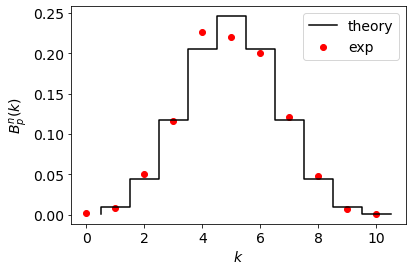

In [40]:
k = np.arange(n+1)
plt.step(k+.5, bd1.pmf(k), label="theory", color='black') #step
plt.scatter(k,bd, color='red', label="exp")
plt.xlabel(r'$k$') 
plt.ylabel(r'$B_p^n(k)$') #Se vogliamo usare il LaTex nel grafico r'$math$'
plt.legend()

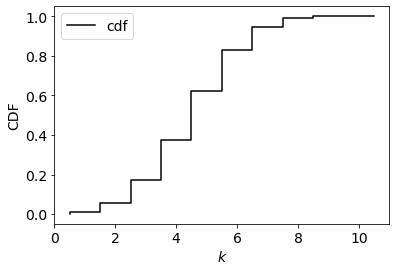

In [27]:
#distribuzione cumulata
plt.step(k+.5, bd1.cdf(k), label="cdf", color='black') #step
plt.xlabel(r'$k$') 
plt.ylabel('CDF') 
plt.legend()

**Esercizio: la distribuzione multinomiale**

Ripetere lo stesso esempio per il caso della distribuzione multinomiale. 
- Utilizzare la funzione scipy.stats.multinomial(n,p) dove p questa volta è un vettore di k componenti che indica le probabilità dei vari casi
- Considerare per semplicità il caso k=3 per cui p=[p1,p2,1-p1-p2]
- Generare la distribuzione empririca  
- Confrontare la distribuzione empirica con quella teorica

Per maggiori informazioni sulla funzione:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html

**Nota**: Esempio di sintassi "if" in python:

if x < 0:

    a=0
    
elif x == 0:

    a=1
    
else:

    a=2